In [37]:
import networkx as nx

# Crear un grafo dirigido para Sa y Sb
G_Sa = nx.DiGraph()
G_Sb = nx.DiGraph()

# Añadir los bordes para Sa basados en las operaciones de lectura y escritura
G_Sa.add_edge('T2', 'T1')  # T2 lee B antes que T1 escribe en B
G_Sa.add_edge('T1', 'T3')  # T1 lee A antes que T3 escribe en A
G_Sa.add_edge('T2', 'T3')  # T2 escribe en C antes que T3 lee de C

# Añadir los bordes para Sb
G_Sb.add_edge('T3', 'T1')  # T3 lee A antes que T1 escribe en A
G_Sb.add_edge('T4', 'T2')  # T4 lee B antes que T2 escribe en B

# Checar si los grafos contienen ciclos para determinar si son conflictos serializables
serializable_Sa = not nx.is_directed_acyclic_graph(G_Sa)
serializable_Sb = not nx.is_directed_acyclic_graph(G_Sb)

# Encontrar una serialización equivalente para Sb si es serializable
serialization_Sb = None
if serializable_Sb:
    serialization_Sb = list(nx.topological_sort(G_Sb))  # Esto nos da una ordenación topológica

(serializable_Sa, serializable_Sb, serialization_Sb)


(False, False, None)

In [38]:
!pip install pandas
!pip install -U scikit-learn
!pip install xgboost

zsh:1: permission denied: pip
zsh:1: permission denied: pip
zsh:1: permission denied: pip


In [39]:
import pandas as pd

In [40]:
data = pd.read_csv("data.csv", encodin = "utf8")

In [41]:
data.head()

,Unnamed: 0,Cuaderno,Pluma,Calculadora,Compra
0,0,Profesional,Bolígrafo,Sharp,1
1,1,Profesional,Lapicero,HP,1
2,2,Italiana,Bolígrafo,Casio,1
3,3,Profesional,Bolígrafo,Sharp,0
4,4,Profesional,Bolígrafo,Casio,1


In [42]:
combinaciones_productos = []
for cuaderno in data.Cuaderno.unique():
    for pluma in data.Pluma.unique():
        for calculadora in data.Calculadora.unique():
            combinaciones_productos.append((cuaderno, pluma, calculadora))
combinaciones_productos

[('Profesional', 'Bolígrafo', 'Sharp'),
 ('Profesional', 'Bolígrafo', 'HP'),
 ('Profesional', 'Bolígrafo', 'Casio'),
 ('Profesional', 'Lapicero', 'Sharp'),
 ('Profesional', 'Lapicero', 'HP'),
 ('Profesional', 'Lapicero', 'Casio'),
 ('Italiana', 'Bolígrafo', 'Sharp'),
 ('Italiana', 'Bolígrafo', 'HP'),
 ('Italiana', 'Bolígrafo', 'Casio'),
 ('Italiana', 'Lapicero', 'Sharp'),
 ('Italiana', 'Lapicero', 'HP'),
 ('Italiana', 'Lapicero', 'Casio'),
 ('Block', 'Bolígrafo', 'Sharp'),
 ('Block', 'Bolígrafo', 'HP'),
 ('Block', 'Bolígrafo', 'Casio'),
 ('Block', 'Lapicero', 'Sharp'),
 ('Block', 'Lapicero', 'HP'),
 ('Block', 'Lapicero', 'Casio')]

In [43]:

# Convertimos la columna 'Compra' a booleano para facilitar el cálculo de probabilidades
data['Compra'] = data['Compra'] == 1

# Calcular las probabilidades base para los eventos individuales
prob_compra = data['Compra'].mean()  # P(Compra)
print("P(Compra): ", prob_compra)
prob_no_compra = 1 - prob_compra      # P(No Compra)
print("P(No Compra): ", prob_no_compra)

# Calcular las probabilidades base para los artículos específicos (todas las combinaciones)
#P('Profesional', 'Bolígrafo', 'Sharp')
#...
#P('Block', 'Lapicero', 'Casio')
p_base_articulos = {}
for combinacion_productos in combinaciones_productos:
    p_base_articulos[combinacion_productos] =data[(data['Cuaderno'] == combinacion_productos[0]) & 
                       (data['Pluma'] == combinacion_productos[1]) & 
                       (data['Calculadora'] == combinacion_productos[2])].shape[0] / data.shape[0]
    print("P(", str(combinacion_productos), "): ", p_base_articulos[combinacion_productos])

#P(Compra | 'Profesional', 'Bolígrafo', 'Sharp')
#...
#P(Compra | 'Block', 'Lapicero', 'Casio')


p_compra_base_articulos = {}
for combinacion_productos in combinaciones_productos:
    p_compra_base_articulos[combinacion_productos] =data[(data['Cuaderno'] == combinacion_productos[0]) & 
                       (data['Pluma'] == combinacion_productos[1]) & 
                       (data['Calculadora'] == combinacion_productos[2])
                        & data['Compra']].shape[0] / data.shape[0]
    print("P(Compra |", str(combinacion_productos), "): ", p_base_articulos[combinacion_productos])


P(Compra):  0.6818181818181818
P(No Compra):  0.31818181818181823
P( ('Profesional', 'Bolígrafo', 'Sharp') ):  0.09090909090909091
P( ('Profesional', 'Bolígrafo', 'HP') ):  0.045454545454545456
P( ('Profesional', 'Bolígrafo', 'Casio') ):  0.045454545454545456
P( ('Profesional', 'Lapicero', 'Sharp') ):  0.0
P( ('Profesional', 'Lapicero', 'HP') ):  0.22727272727272727
P( ('Profesional', 'Lapicero', 'Casio') ):  0.09090909090909091
P( ('Italiana', 'Bolígrafo', 'Sharp') ):  0.045454545454545456
P( ('Italiana', 'Bolígrafo', 'HP') ):  0.045454545454545456
P( ('Italiana', 'Bolígrafo', 'Casio') ):  0.13636363636363635
P( ('Italiana', 'Lapicero', 'Sharp') ):  0.0
P( ('Italiana', 'Lapicero', 'HP') ):  0.09090909090909091
P( ('Italiana', 'Lapicero', 'Casio') ):  0.0
P( ('Block', 'Bolígrafo', 'Sharp') ):  0.045454545454545456
P( ('Block', 'Bolígrafo', 'HP') ):  0.0
P( ('Block', 'Bolígrafo', 'Casio') ):  0.045454545454545456
P( ('Block', 'Lapicero', 'Sharp') ):  0.045454545454545456
P( ('Block', 'L

In [44]:
#a) Determine la probabilidad de comprar un cuaderno italiano, un bolígrafo y una calculadora Sharp
#Respuesta 1

#(P(compra| Italiana, Bolígrafo, Sharp) * P(Italiana, boligrafo, sharp)) / sum_i(P(compra| combinacion_i) * P(combinacion_i))
print("Respueta Pregunta a")
p_compra_base_articulos[("Italiana", "Bolígrafo", "Sharp")] * p_base_articulos[("Italiana", "Bolígrafo", "Sharp")] / sum([p_compra_base_articulos[combinacion_productos] * p_base_articulos[combinacion_productos] for combinacion_productos in combinaciones_productos])

0.02702702702702703

In [49]:


#P(No Compra | 'Profesional', 'Bolígrafo', 'Sharp')
#...
#P(No Compra | 'Block', 'Lapicero', 'Casio')

p_no_compra_base_articulos = {}
for combinacion_productos in combinaciones_productos:
    p_no_compra_base_articulos[combinacion_productos] =data[(data['Cuaderno'] == combinacion_productos[0]) & 
                       (data['Pluma'] == combinacion_productos[1]) & 
                       (data['Calculadora'] == combinacion_productos[2])
                        & (-data['Compra'])].shape[0] / data.shape[0]
    print("P(No Compra |", str(combinacion_productos), "): ", p_base_articulos[combinacion_productos])


P(No Compra | ('Profesional', 'Bolígrafo', 'Sharp') ):  0.09090909090909091
P(No Compra | ('Profesional', 'Bolígrafo', 'HP') ):  0.045454545454545456
P(No Compra | ('Profesional', 'Bolígrafo', 'Casio') ):  0.045454545454545456
P(No Compra | ('Profesional', 'Lapicero', 'Sharp') ):  0.0
P(No Compra | ('Profesional', 'Lapicero', 'HP') ):  0.22727272727272727
P(No Compra | ('Profesional', 'Lapicero', 'Casio') ):  0.09090909090909091
P(No Compra | ('Italiana', 'Bolígrafo', 'Sharp') ):  0.045454545454545456
P(No Compra | ('Italiana', 'Bolígrafo', 'HP') ):  0.045454545454545456
P(No Compra | ('Italiana', 'Bolígrafo', 'Casio') ):  0.13636363636363635
P(No Compra | ('Italiana', 'Lapicero', 'Sharp') ):  0.0
P(No Compra | ('Italiana', 'Lapicero', 'HP') ):  0.09090909090909091
P(No Compra | ('Italiana', 'Lapicero', 'Casio') ):  0.0
P(No Compra | ('Block', 'Bolígrafo', 'Sharp') ):  0.045454545454545456
P(No Compra | ('Block', 'Bolígrafo', 'HP') ):  0.0
P(No Compra | ('Block', 'Bolígrafo', 'Casio') 

In [50]:
#b) Determine la probabilidad de no comprar un cuaderno profesional, un lapicero y una calculadora HP

#(P(No compra| Profesional, Lapicero, HP) * P(Profesional, Lapicero, HP)) / sum_i(P(No Compra| combinacion_i) * P(combinacion_i))
print("Respueta Pregunta b")

p_compra_base_articulos[("Profesional", "Lapicero", "HP")] * p_base_articulos[("Italiana", "Bolígrafo", "Sharp")] / sum([p_compra_base_articulos[combinacion_productos] * p_base_articulos[combinacion_productos] for combinacion_productos in combinaciones_productos])

0.08108108108108107

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import pandas as pd

# Datos extraídos de la imagen proporcionada por el usuario
# Se ha convertido manualmente la imagen en una estructura de datos para su uso en el análisis
data = {
    'Edad': [25, 17, 23, 24, 74, 40, 32, 70, 64, 45, 33, 74, 73, 38, 72, 27, 62, 72],
    'Género': ['F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'M', 'F', 'F', 'F', 'M', 'M'],
    'PS': ['ALTO', 'ALTO', 'BAJO', 'NORMAL', 'BAJO', 'NORMAL', 'ALTO', 'BAJO', 'ALTO', 'ALTO', 'BAJO', 'BAJO', 'ALTO', 'BAJO', 'ALTO', 'ALTO', 'ALTO', 'ALTO'],
    'Colesterol': ['ALTO', 'ALTO', 'NORMAL', 'NORMAL', 'ALTO', 'ALTO', 'ALTO', 'ALTO', 'NORMAL', 'ALTO', 'NORMAL', 'NORMAL', 'NORMAL', 'ALTO', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL'],
    'Na': [0.675996, 0.539756, 0.556453, 0.845236, 0.849624, 0.67683, 0.581664, 0.716359, 0.640789, 0.664105, 0.821805, 0.772225, 0.792131, 0.794318, 0.533558, 0.555064, 0.51015, 0.819483],
    'K': [0.074834, 0.030081, 0.03618, 0.055498, 0.076902, 0.049634, 0.024803, 0.036936, 0.078302, 0.047819, 0.027674, 0.04794, 0.062171, 0.051825, 0.021289, 0.04665, 0.071463, 0.073802],
    'fármaco': ['FármacoA', 'FármacoY', 'FármacoY', 'FármacoY', 'FármacoC', 'FármacoX', 'FármacoY', 'FármacoY', 'FármacoB', 'FármacoA', 'FármacoY', 'FármacoY', 'FármacoB', 'FármacoY', 'FármacoA', 'FármacoA', 'FármacoB', 'FármacoB']
}

# Convertir los datos a un DataFrame para su uso en el análisis
df = pd.DataFrame(data)
#df.to_csv("datos_farmaco.csv")

In [83]:
df.describe()

,Edad,Na,K
count,18.000000,18.000000,18.000000
mean,48.055556,0.685864,0.050767
std,21.490004,0.119512,0.018906
min,17.000000,0.510150,0.021289
25%,28.250000,0.562756,0.036369
50%,42.500000,0.676413,0.048787
75%,71.500000,0.793771,0.069140
max,74.000000,0.849624,0.078302


In [84]:
#nfolds
cv = 5

# Codificación de variables categóricas (Género, PS, Colesterol) en formato numérico
df['Género'] = df['Género'].map({'F': 0, 'M': 1})
df['PS'] = df['PS'].map({'BAJO': 0, 'NORMAL': 1, 'ALTO': 2})
df['Colesterol'] = df['Colesterol'].map({'NORMAL': 0, 'ALTO': 1})
df['fármaco'] = df['fármaco'].map({llave: valor for valor, llave in enumerate(df["fármaco"].unique())})



# Separar las variables independientes (X) y la variable dependiente (y)
X = df.drop('fármaco', axis=1)
y = df['fármaco']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



resultados_df = pd.DataFrame(columns=['Color_Space_Function', 'N_Samples', 'Model', 'CV_Mean_Accuracy', 'Test_Accuracy', 'Other_Metrics'])

resultados = ""

pipelines = {
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())]),
    'Decision Tree': Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())]),
    'KNN': Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier())]),
    'Random Forest': Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())]),
    'Gradient Boosting': Pipeline([('scaler', StandardScaler()), ('classifier', GradientBoostingClassifier())]),
    #'XGBoost': Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))]),
    #'HistGradientBoostingClassifier': Pipeline([('scaler', StandardScaler()), ('classifier', HistGradientBoostingClassifier())]),
}


cv_results = dict()
test_scores = dict()

for name, pipeline in pipelines.items():

    cv_score = cross_validate(pipeline, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1, return_train_score=False)


    pipeline.fit(X_train, y_train)


    y_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)



    # Store results
    cv_results[name] = cv_score['test_score']
    test_scores[name] = test_accuracy
    # Calcular Precisión
    precision = precision_score(y_test, y_pred, average = "weighted")

    # Calcular Recall
    recall = recall_score(y_test, y_pred, average = "weighted")

    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average = "weighted")
    print(f'{name} - CV Mean Accuracy: {cv_score["test_score"].mean():.3f} (Std: {cv_score["test_score"].std():.3f}), Test Accuracy: {test_accuracy:.3f}')
    print("Clasification report")
    print(classification_report(y_test, y_pred))

    resultados += f"{name} & {cv_score['test_score'].mean():.3f} $\\pm$ {cv_score['test_score'].std():.3f} & {test_accuracy:.3f} \\\\\n"
    resultados += "\\hline\n"
    resultados_df = resultados_df.append({
        'Model': name,
        'CV_Mean_Accuracy': cv_score['test_score'],
        'Test_Accuracy': test_accuracy,
        'precision':precision,
        'recall': recall,
        'f1': f1

            }, ignore_index=True)

# Imprimir los resultados en formato de tabla LaTeX
print("\\begin{tabular}{|l|c|c|}")
print("\\hline")
print("Modelo & CV Mean Accuracy & Test Accuracy \\\\")
print("\\hline")
print(resultados)
print("\\end{tabular}")

(cv_results, test_scores)

resultados_df.to_pickle("resultados.pkl")


/Users/arturotellezcortes/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/arturotellezcortes/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arturotellezcortes/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arturotellezcortes/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:134

Logistic Regression - CV Mean Accuracy: 0.500 (Std: 0.333), Test Accuracy: 0.833
Clasification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1

    accuracy                           0.83         6
   macro avg       0.69      0.75      0.71         6
weighted avg       0.71      0.83      0.76         6

Decision Tree - CV Mean Accuracy: 0.567 (Std: 0.327), Test Accuracy: 0.500
Clasification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1

    accuracy                           0.

/Users/arturotellezcortes/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arturotellezcortes/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arturotellezcortes/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, 

Random Forest - CV Mean Accuracy: 0.567 (Std: 0.327), Test Accuracy: 0.333
Clasification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.33      0.50         3
           3       0.00      0.00      0.00         1
           4       0.33      1.00      0.50         1

    accuracy                           0.33         6
   macro avg       0.33      0.33      0.25         6
weighted avg       0.56      0.33      0.33         6

Gradient Boosting - CV Mean Accuracy: 0.567 (Std: 0.327), Test Accuracy: 0.333
Clasification report
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       1.00      0.33      0.50         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1

    accuracy                           0.33         6
   macro avg       0.31      0.33      0.23

/Users/arturotellezcortes/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arturotellezcortes/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arturotellezcortes/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, 

In [86]:
resultados_df

,Color_Space_Function,N_Samples,Model,CV_Mean_Accuracy,Test_Accuracy,Other_Metrics,precision,recall,f1
0,NaN,NaN,Logistic Regression,"[0.3333333333333333, 0.6666666666666666, 1.0, ...",0.833333,NaN,0.708333,0.833333,0.761905
1,NaN,NaN,Decision Tree,"[0.6666666666666666, 0.6666666666666666, 1.0, ...",0.500000,NaN,0.583333,0.500000,0.511111
2,NaN,NaN,KNN,"[0.3333333333333333, 0.3333333333333333, 0.5, ...",0.666667,NaN,0.722222,0.666667,0.650000
3,NaN,NaN,Random Forest,"[0.6666666666666666, 0.6666666666666666, 1.0, ...",0.333333,NaN,0.555556,0.333333,0.333333
4,NaN,NaN,Gradient Boosting,"[0.6666666666666666, 0.6666666666666666, 1.0, ...",0.333333,NaN,0.541667,0.333333,0.316667


In [89]:
!pip3 install graphviz

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 422.8 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [90]:
import graphviz

# Crear un objeto de diagrama de Graphviz
dot = graphviz.Digraph(comment='Sistema Musical')

# Agregar nodos para las entidades
dot.node('A', 'Disco', shape='box')
dot.node('B', 'Pieza Musical', shape='box')
dot.node('C', 'Persona', shape='box')

# Agregar atributos para Disco
dot.node('A1', 'ID Disco', shape='plaintext')
dot.node('A2', 'Título', shape='plaintext')
dot.node('A3', 'Año de Producción', shape='plaintext')

# Agregar atributos para Pieza Musical
dot.node('B1', 'Número de Track', shape='plaintext')
dot.node('B2', 'Título Pieza', shape='plaintext')

# Agregar atributos para Persona
dot.node('C1', 'ID Persona', shape='plaintext')
dot.node('C2', 'Nombre', shape='plaintext')
dot.node('C3', 'Nacionalidad', shape='plaintext')

# Agregar relaciones entre entidades y sus atributos
dot.edge('A', 'A1', label=' ')
dot.edge('A', 'A2', label=' ')
dot.edge('A', 'A3', label=' ')
dot.edge('B', 'B1', label=' ')
dot.edge('B', 'B2', label=' ')
dot.edge('C', 'C1', label=' ')
dot.edge('C', 'C2', label=' ')
dot.edge('C', 'C3', label=' ')

# Agregar relaciones entre entidades
dot.edge('A', 'B', label='contiene')
dot.edge('B', 'C', label='interpretada/compuesta por')

# Mostrar el diagrama
dot


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

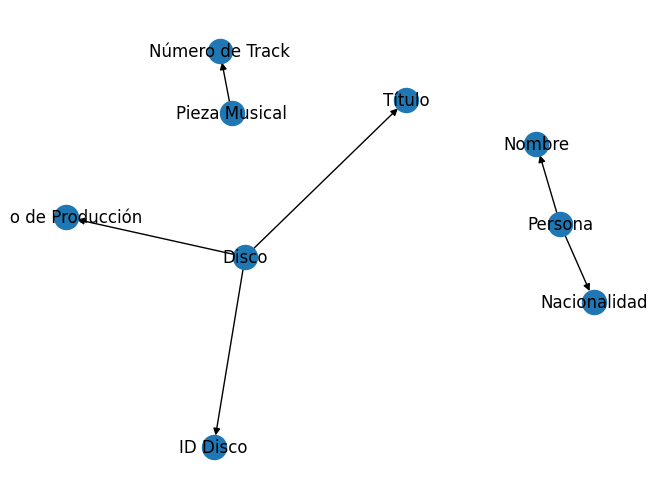

In [91]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Agregar nodos (entidades y atributos)
G.add_node("Disco")
G.add_node("ID Disco")
G.add_node("Título")
G.add_node("Año de Producción")
G.add_node("Pieza Musical")
G.add_node("Número de Track")
G.add_node("Persona")
G.add_node("Nombre")
G.add_node("Nacionalidad")

# Agregar aristas (relaciones)
G.add_edge("Disco", "ID Disco")
G.add_edge("Disco", "Título")
G.add_edge("Disco", "Año de Producción")
G.add_edge("Pieza Musical", "Número de Track")
G.add_edge("Persona", "Nombre")
G.add_edge("Persona", "Nacionalidad")

# Dibujar el gráfico
nx.draw(G, with_labels=True)
plt.show()


In [98]:
!pip3 install pygraphviz
!pip3 install ERAlchemy

Defaulting to user installation because normal site-packages is not writeable
  Using cached pygraphviz-1.11.zip (120 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [55 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-universal2-3.9
      creating build/lib.macosx-10.9-universal2-3.9/pygraphviz
      copying pygraphviz/scraper.py -> build/lib.macosx-10.9-universal2-3.9/pygraphviz
      copying pygraphviz/graphviz.py -> build/lib.macosx-10.9-universal2-3.9/pygraphviz
      copying pygraphviz/__init__.py -> build/lib.macosx-10.9-universal2-3.9/pygraphviz
      copying pygraphviz/agraph.py -> build/lib.macosx-10.9-universal2-3.9/pygraphviz
      copying pygraphviz/testing.py -> build/lib.macosx-10.9-universal2-3.9/pygraphviz
      creating build/lib.macosx-10.9-universal2-3.9/p

In [99]:
from eralchemy import render_er

# Genera el diagrama ER a partir del archivo Markdown
render_er("ER.md", "diagrama_er.png")

ModuleNotFoundError: No module named 'eralchemy'